In [16]:
import pandas as pd

loc_data = pd.read_csv('./data/processed_headlines_locations.csv', index_col=0)
loc_data[['headline', 'city', 'latitude', 'longitude', 'countrycode']].head()

,headline,city,latitude,longitude,countrycode
0,Zika Outbreak Hits Miami,Miami,25.77427,-80.19366,US
1,Could Zika Reach New York City?,New York City,40.71427,-74.00597,US
2,First Case of Zika in Miami Beach,Miami,25.77427,-80.19366,US
3,"Mystery Virus Spreads in Recife, Brazil",Recife,-8.05389,-34.88111,BR
4,Dallas man comes down with case of Zika,Dallas,32.78306,-96.80667,US


In [17]:
def cluster_location(clusterer, loc_data, lat_string="latitude", lon_string="longitude"):
    features = loc_data[[lat_string, lon_string]].copy()
    clusterer.fit(features)
    loc_data["cluster"] = clusterer.labels_
    return loc_data

In [18]:
# Visulize the clusters
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
%matplotlib inline

def plot_clusters(data):
    """
    Plot clustered data on a basemap.
    """
    m = Basemap()

    plt.figure(figsize=(16, 10))
    m.shadedrelief()

    x, y = m(x=data["longitude"], y=data["latitude"])
    data["x"], data["y"] = x, y

    # plt.scatter(x, y, 20, marker="o", color="red")

    # Iterate through each cluster and plot
    for cluster, grouped in data.groupby("cluster"):
        if cluster == -1:
            # Handle the unassigned headlines
            plt.scatter(
                grouped["x"],
                grouped["y"],
                s=60,
                alpha=0.8,
                marker="o",
                label=f"Cluster: None",
                c="k",
            )
        else:
            plt.scatter(
                grouped["x"],
                grouped["y"],
                s=60,
                alpha=0.8,
                marker="o",
                label=f"Cluster: {cluster}",
            )

    # Add a legend and title (put legend to right of plot)
    ax = plt.gca()
    ax.legend(loc=(1, 0))
    _ = ax.set_title("Locations of Headlines", size=20)
    return

# K-Means

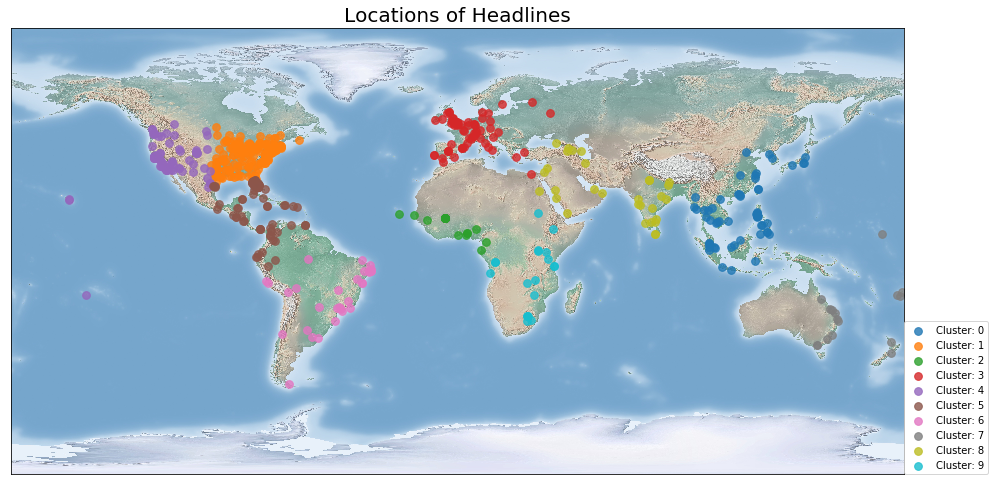

In [19]:
from sklearn.cluster import KMeans

kmeans_clusterer = KMeans(n_clusters=10)
loc_data = cluster_location(kmeans_clusterer, loc_data)
plot_clusters(loc_data)

# DBSCAN

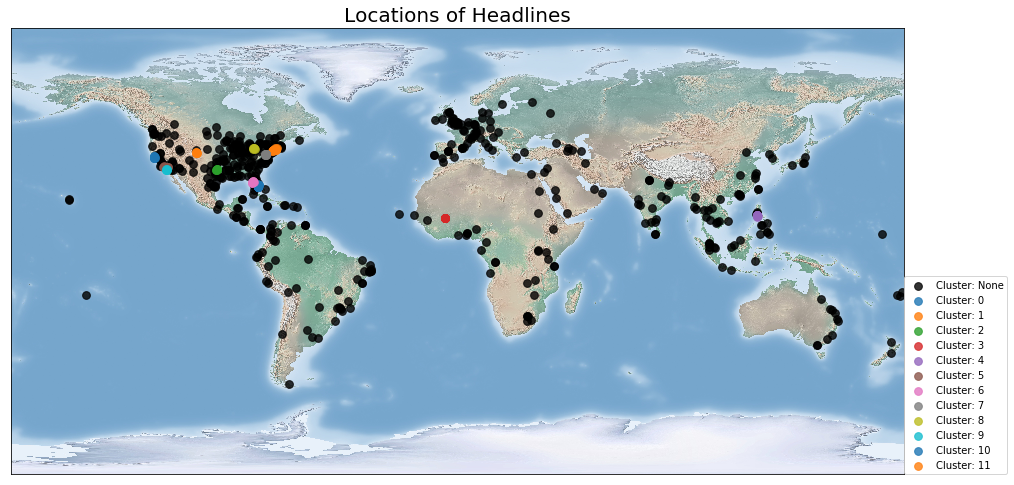

In [20]:
from sklearn.cluster import DBSCAN

# Default sklearn parameters
dbscan_clusterer = DBSCAN()
loc_data = cluster_location(dbscan_clusterer, loc_data)
plot_clusters(loc_data)
plt.savefig('./figs/DBSCAN_clustering_map.png')

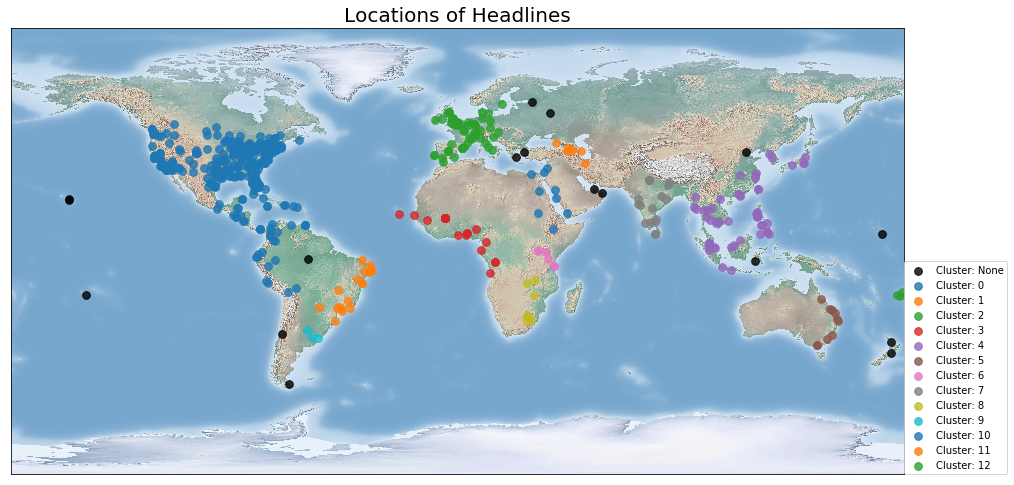

In [21]:
euclidean_clusterer = DBSCAN(
    eps=9, min_samples=3, metric="euclidean",
)
loc_data = cluster_location(euclidean_clusterer, loc_data)
plot_clusters(loc_data)
plt.savefig('./figs/DBSCAN_euclidean_clustering_map.png')

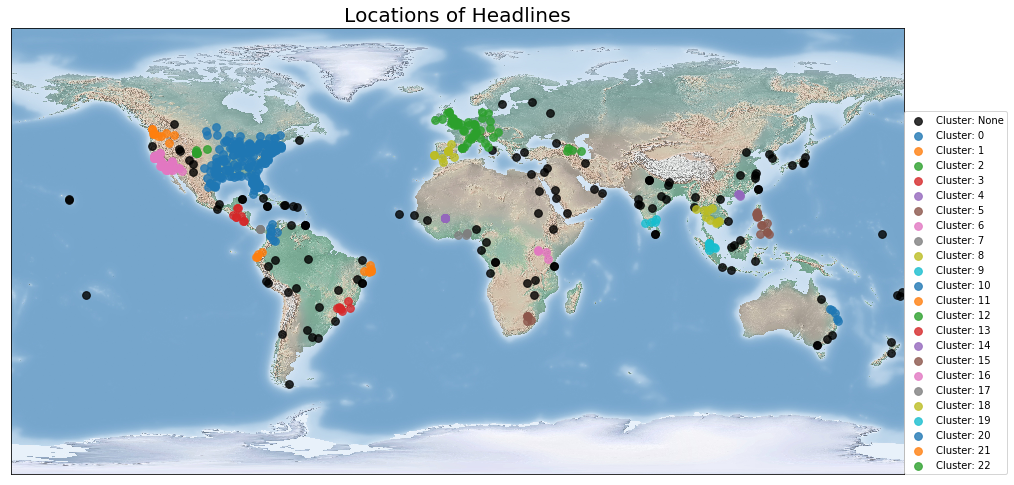

In [22]:
import numpy as np

def great_circle_distance(coord1, coord2, radius=3956):
    if np.array_equal(coord1, coord2):
        return 0.0

    coord1, coord2 = np.radians(coord1), np.radians(coord2)
    delta_x, delta_y = coord2 - coord1
    
    haversin = np.sin(delta_x / 2) ** 2 + np.product(
        [np.cos(coord1[0]), np.cos(coord2[0]), np.sin(delta_y / 2) ** 2]
    )

    return 2 * radius * np.arcsin(haversin ** 0.5)

great_circle_clusterer = DBSCAN(
    eps=250, min_samples=4, metric=great_circle_distance,
)


loc_data = cluster_location(
     great_circle_clusterer, loc_data, lon_string="longitude", lat_string="latitude"
)

plot_clusters(loc_data)
plt.savefig('./figs/DBSCAN_great_circle_clustering_map.png')

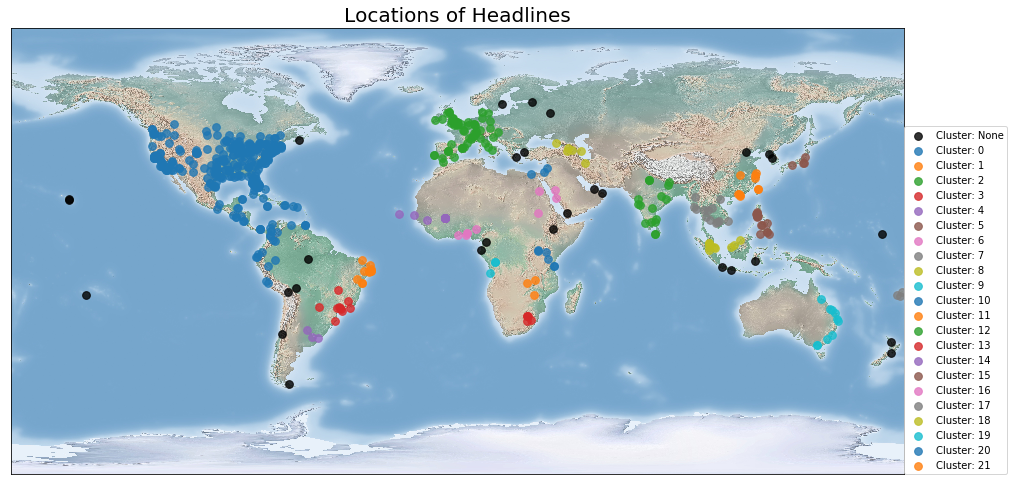

In [23]:
manhattan_clusterer = DBSCAN(
    eps=9, min_samples=3, metric="manhattan",
)
loc_data = cluster_location(manhattan_clusterer, loc_data)
plot_clusters(loc_data)
plt.savefig('./figs/DBSCAN_manhattan_clustering_map.png')

In [24]:
loc_data.head()

,headline,city,accent_city,latitude,longitude,countrycode,pop,cluster,x,y
0,Zika Outbreak Hits Miami,Miami,Miami,25.77427,-80.19366,US,441003.0,0,-80.19366,25.77427
1,Could Zika Reach New York City?,New York City,New York City,40.71427,-74.00597,US,8175133.0,0,-74.00597,40.71427
2,First Case of Zika in Miami Beach,Miami,Miami,25.77427,-80.19366,US,441003.0,0,-80.19366,25.77427
3,"Mystery Virus Spreads in Recife, Brazil",Recife,Recife,-8.05389,-34.88111,BR,1478098.0,1,-34.88111,-8.05389
4,Dallas man comes down with case of Zika,Dallas,Dallas,32.78306,-96.80667,US,1300092.0,0,-96.80667,32.78306
